# –¢e–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ

In [1]:
! pip install spacy -q
! python -m spacy download ru_core_news_sm -q
! pip install pyLDAvis -q

2023-07-01 04:34:05.505617: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-01 04:34:10.018257: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 15.3/15.3 MB 18.3 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')


–ü–æ–¥–∫–ª—é—á–∞–µ–º –±–∏–±–ª–∏–æ—Ç–µ–∫–∏.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import re
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from gensim.models import LsiModel
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
import json
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim
%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Exploratory data analysis

–£–∫–∞–∂–µ–º –ø—É—Ç—å –∫ —Ñ–∞–π–ª—É.

In [3]:
!gdown 1WbUGXxfXmWnBy93DdFQdT28s8eZfZSjj
!gdown 1Z53Jdj-E3E2OfnJhwrqLuvcQrEZ9aNd5

Downloading...
From: https://drive.google.com/uc?id=1WbUGXxfXmWnBy93DdFQdT28s8eZfZSjj
To: /content/clean_posts.csv
100% 3.79M/3.79M [00:00<00:00, 186MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Z53Jdj-E3E2OfnJhwrqLuvcQrEZ9aNd5
To: /content/raw_posts.csv
100% 23.9M/23.9M [00:00<00:00, 74.5MB/s]


–ó–∞–≥—Ä—É–∑–∏–º –¥–∞–Ω–Ω—ã–µ –≤ dataframe.

In [4]:
df = pd.read_csv('/content/clean_posts.csv')
df.head()

account_link       search_keywords  \
0  https://www.linkedin.com/in/varvara-kulmeteva-...  senior web developer   
1               https://www.linkedin.com/in/rauventa       senior frontend   
2       https://www.linkedin.com/in/denis-kuchkildin   middle data analyst   
3  https://www.linkedin.com/in/ACoAAC4yJzEB4TjXkJ...    senior ML engineer   
4         https://www.linkedin.com/in/oleg-malyshkin  senior test engineer   

                name                                              title  \
0  Varvara Kulmeteva            Senior Web Developer - IBS InfinitySoft   
1     Ilya Moiseenko  LOOKING FOR "Senior/Lead Frontend (React) Deve...   
2   Denis Kuchkildin                           Data Analyst at X5 Group   
3       Ian Silantev  MSc Data Science in University of East London ...   
4     Oleg Malyshkin     Senior Test Automation Engineer at GlobalLogic   

    works_at                                              intro  experience  \
0        IBS  –ù–∞–≤—ã–∫–∏: ReactJS ¬∑ JavaScript ¬∑ HTML ¬∑ CSS–ù–∞–≤—ã–∫...        10.0   
1  Centicore  Ilya, React Developer from Moscow.Ilya, React ...         8.0   
2   X5 Group  I have a strong engineering background and mor...         6.0   
3  Neurospot  Absolutely in love with Data Science, AI and M...         2.0   
4        NaN  Hi everyone, I am Oleg Malyshkin - Senior Test...         4.0   

                                place  posts_cnt  \
0  –ú–æ—Å–∫–≤–∞, –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –†–æ—Å—Å–∏—è          0   
1              –ú–æ—Å–∫–≤–∞, –ú–æ—Å–∫–≤–∞, –†–æ—Å—Å–∏—è          1   
2              –ú–æ—Å–∫–≤–∞, –ú–æ—Å–∫–≤–∞, –†–æ—Å—Å–∏—è          1   
3                     –¢–±–∏–ª–∏—Å–∏, –ì—Ä—É–∑–∏—è          0   
4                 –ö–∏–µ–≤, –ö–∏–µ–≤, –£–∫—Ä–∞–∏–Ω–∞          9   

                                           post_text  reaction_cnt  \
0                                                NaN           NaN   
1  –Ø —Ç–æ–ª—å–∫–æ —á—Ç–æ –ø–æ–ª—É—á–∏–ª(–∞) –∑–Ω–∞—á–æ–∫ –∑–∞ –Ω–∞–≤—ã–∫ ¬´JavaS...           1.0   
2  Hi everyone - I am looking for a new role and ...           NaN   
3                                                NaN           NaN   
4  Finding a job for trainees and juniors is a ch...           1.0   

   comments_cnt  repost_cnt  
0           NaN         NaN  
1           NaN         NaN  
2           NaN         NaN  
3           NaN         NaN  
4           NaN         NaN

In [5]:
df2 = pd.read_csv('/content/raw_posts.csv')
df2.head()

account_link       search_keywords  \
0  https://www.linkedin.com/in/varvara-kulmeteva-...  senior web developer   
1               https://www.linkedin.com/in/rauventa       senior frontend   
2       https://www.linkedin.com/in/denis-kuchkildin   middle data analyst   
3  https://www.linkedin.com/in/ACoAAC4yJzEB4TjXkJ...    senior ML engineer   
4         https://www.linkedin.com/in/oleg-malyshkin  senior test engineer   

                name                                              title  \
0  Varvara Kulmeteva            Senior Web Developer - IBS InfinitySoft   
1     Ilya Moiseenko  LOOKING FOR "Senior/Lead Frontend (React) Deve...   
2   Denis Kuchkildin                           Data Analyst at X5 Group   
3       Ian Silantev  MSc Data Science in University of East London ...   
4     Oleg Malyshkin     Senior Test Automation Engineer at GlobalLogic   

    works_at                                              intro  experience  \
0        IBS  –ù–∞–≤—ã–∫–∏: ReactJS ¬∑ JavaScript ¬∑ HTML ¬∑ CSS–ù–∞–≤—ã–∫...        10.0   
1  Centicore  Ilya, React Developer from Moscow.Ilya, React ...         8.0   
2   X5 Group  I have a strong engineering background and mor...         6.0   
3  Neurospot  Absolutely in love with Data Science, AI and M...         2.0   
4        NaN  Hi everyone, I am Oleg Malyshkin - Senior Test...         4.0   

                                place  posts_cnt  \
0  –ú–æ—Å–∫–≤–∞, –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –†–æ—Å—Å–∏—è        0.0   
1              –ú–æ—Å–∫–≤–∞, –ú–æ—Å–∫–≤–∞, –†–æ—Å—Å–∏—è        1.0   
2              –ú–æ—Å–∫–≤–∞, –ú–æ—Å–∫–≤–∞, –†–æ—Å—Å–∏—è        1.0   
3                     –¢–±–∏–ª–∏—Å–∏, –ì—Ä—É–∑–∏—è        0.0   
4                 –ö–∏–µ–≤, –ö–∏–µ–≤, –£–∫—Ä–∞–∏–Ω–∞        9.0   

                                           post_text reaction_cnt  \
0                                                NaN          NaN   
1  –Ø —Ç–æ–ª—å–∫–æ —á—Ç–æ –ø–æ–ª—É—á–∏–ª(–∞) –∑–Ω–∞—á–æ–∫ –∑–∞ –Ω–∞–≤—ã–∫ ¬´JavaS...          1.0   
2  Hi everyone - I am looking for a new role and ...          NaN   
3                                                NaN          NaN   
4  Finding a job for trainees and juniors is a ch...          1.0   

   comments_cnt  repost_cnt  
0           NaN         NaN  
1           NaN         NaN  
2           NaN         NaN  
3           NaN         NaN  
4           NaN         NaN

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –¥—É–±–ª–∏.

In [6]:
df.duplicated().sum(),df2.duplicated().sum()

(0, 4266)

In [7]:
df3 = pd.concat([df, df2])

–£–¥–∞–ª–∏–º –¥—É–±–ª–∏–∫–∞—Ç—ã.

In [8]:
df = df3.drop_duplicates()

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞–∑–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏.

In [9]:
df.shape

(16148, 13)

–ü–æ—Å—á–∏—Ç–∞–µ–º –∫–æ–ª–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∏–º–µ–Ω —Å—Å—ã–ª–æ–∫ –Ω–∞ –∞–∫–∫–∞—É–Ω—Ç—ã.

In [10]:
df.account_link.nunique()

1948

In [11]:
df = df.fillna(0)

1092 —Å—Å—ã–ª–∫–∏ –Ω–∞ –∞–∫–∫–∞—É–Ω—Ç—ã.

**–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —á–∏—Å–ª—è–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏.**

In [12]:
df.describe()

experience     posts_cnt  comments_cnt    repost_cnt
count  16148.000000  16148.000000   16148.00000  16148.000000
mean       6.260156     22.683428       5.53375      5.788828
std       58.091625     68.225547      44.17043     45.247801
min        0.000000      0.000000       0.00000      0.000000
25%        0.000000      0.000000       0.00000      0.000000
50%        0.000000      0.000000       0.00000      0.000000
75%        5.000000      2.000000       1.00000      0.000000
max     1806.000000    376.000000     967.00000    979.000000

# Experience - –æ–ø—ã—Ç.

–û—á–µ–≤–∏–¥–Ω–æ, —á—Ç–æ –µ—Å—Ç—å –≤—ã–±—Ä–æ—Å—ã –ø–æ –æ–ø—ã—Ç—É. –ù—É –Ω–∏–∫–∞–∫ –±–æ–ª—å—à–µ 100 –ª–µ—Ç —É –Ω–∞—Å –Ω–µ –º–æ–∂–µ—Ç –±—ã—Ç—å –≤ —ç—Ç–∏—Ö –¥–∞–Ω–Ω—ã—Ö. –¢–µ–º –±–æ–ª–µ–µ 800 –ª–µ—Ç. –î–∞–Ω–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –º—ã –Ω–µ –æ—Ü–µ–Ω–∏–≤–∞–µ–º. –ü–æ—Å–º–æ—Ç—Ä–∏–º —Å–∫–æ–ª—å–∫–æ —Ç–∞–∫–∏—Ö —Å—Ç—Ä–æ–∫.

In [13]:
len(df[df.experience>100])

70

–ü–æ—Å–º–æ—Ç—Ä–∏–º, –µ—Å—Ç—å –ª–∏ –ø–æ—Å—Ç—ã —É –ª—é–¥–µ–π —Å–æ–ø—ã—Ç–æ–º –±–æ–ª–µ–µ 100 –ª–µ—Ç.

In [14]:
df[df.experience>100].posts_cnt.value_counts(dropna=False)

posts_cnt
0.0    38
8.0    10
4.0     8
2.0     8
7.0     6
Name: count, dtype: int64

–ü–æ—Å—Ç—ã –µ—Å—Ç—å, –Ω–µ –±—É–¥–µ–º –∏—Ö —É–¥–∞–ª—è—Ç—å. –ù–æ –ø–æ—Å–º–æ—Ç—Ä–∏ –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –±–µ–∑ —ç—Ç–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π.

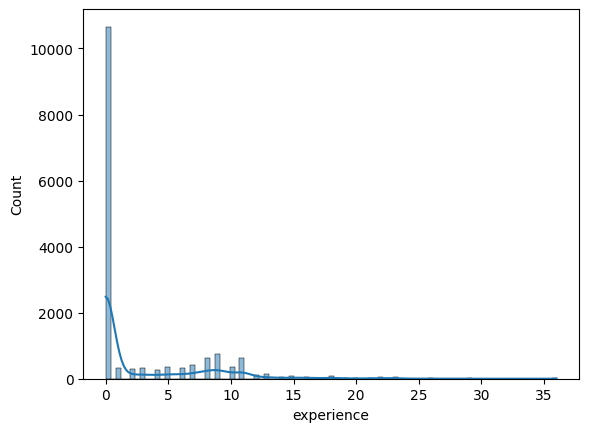

In [15]:
sns.histplot(df.query('experience<100')['experience'], kde=True)
plt.show()

–ö–∞–∫ –≤–∏–¥–Ω–æ, –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Å –æ–ø—ã—Ç–æ–º –¥–æ 10 –ª–µ—Ç. –û–∫–æ–ª–æ 10 –ª–µ—Ç - –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–π –æ–ø—ã—Ç —Ä–∞–±–æ—Ç—ã —É —Å–æ–±—Ä–∞–Ω–Ω—ã—Ö —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–æ–≤. –ê –¥–∞–ª–µ–µ –≤–∏–¥–∏–º —Ä–µ–∑–∫–∏–π —Å–ø–∞–¥. –õ—é–¥–µ–π —Å –æ–ø—ã—Ç–æ–º –±–æ–ª–µ–µ 15 –ª–µ—Ç –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–µ—Ç. –ß—Ç–æ –ª–æ–≥–∏—á–Ω–æ IT –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –º–æ–ª–æ–¥–∞—è –æ—Ç—Ä–∞—Å–ª—å.

# posts_cnt - –∫–æ–ª-–≤–æ –ø–æ—Å—Ç–æ–≤.

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–ª–µ–Ω–∏–µ –ø–æ –∫–æ–ª-–≤—É –ø–æ—Å—Ç–æ–≤.

In [16]:
sns.histplot(df.posts_cnt, kde=True)
plt.show()

–ë–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø—Ä–æ—Ñ–∏–ª–µ–π –Ω–µ –∏–º–µ—é—Ç –ø–æ—Å—Ç–æ–≤. –ï—Å—Ç—å –µ–¥–∏–Ω–∏—á–Ω—ã–µ –ø–∏–∫–∏ —É 200, 250 –∏ 370. –ü–æ—Å–º–æ—Ç—Ä–∏–º, —Å–∫–æ–ª—å–∫–æ —É –Ω–∞—Å —Ç–∞–∫–∏—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π.

In [17]:
df[df.posts_cnt>170]['name'].nunique()

4

4 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è —Å —Ç–∞–∫–∏–º –∫–æ–ª-–≤–æ–º –ø–æ—Å—Ç–æ–≤.–ò–Ω—Ç–µ—Ä–µ—Å–Ω–æ —É–∑–Ω–∞—Ç—å –∏—Ö –¥–æ–ª–∂–Ω–æ—Å—Ç–∏.

In [18]:
df[df.posts_cnt>170]['title'].unique()

array(['Senior Data Scientist / NLP Engineer',
       'Senior Technical Recruiter (Armenia/Serbia)', 'Build Engineer',
       'Senior Front-end Developer'], dtype=object)

–≠—Ç–æ —Ä–µ–∫—Ä—É—Ç–µ—Ä, Seniour DS –∏ Seniour Frotend Developer –∏ Build Engineer.

# reaction_cnt - –∫–æ–ª-–≤–æ —Ä–µ–∞–∫—Ü–∏–π.

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ reaction_cnt.

In [19]:
df['reaction_cnt'] = [str(x).replace(',',".") for x in df['reaction_cnt']]

In [20]:
df['reaction_cnt'] = [str(x).replace(' ',"") for x in df['reaction_cnt']]

In [21]:
df['reaction_cnt'] = df['reaction_cnt'].astype('float64')

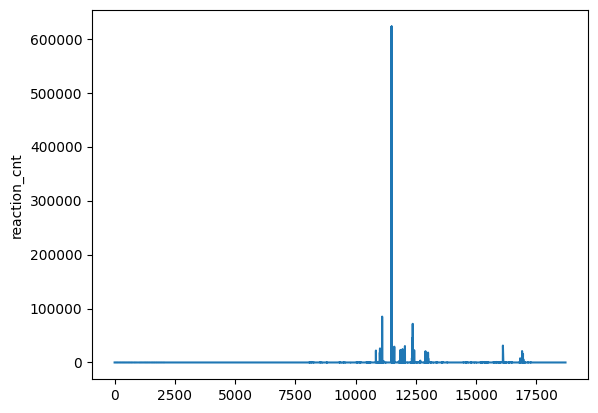

In [22]:
sns.lineplot(df['reaction_cnt'])
plt.show()

–°—É–¥—è –ø–æ –≥—Ä–∞—Ñ–∏–∫—É —É –Ω–∞—Å –µ—Å—Ç—å –º–Ω–æ–≥–æ –≤—ã–±—Ä–æ–≤–æ–≤. –ü–æ—Å–º–æ—Ç—Ä–∏–º –∫–æ–ª–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ—Å—Ç–æ–≤ —Å –±–æ–ª–µ–µ —á–µ–º 100 —Ä–µ–∞–∫—Ü–∏—è–º–∏—é

In [23]:
df[df.reaction_cnt>100]

account_link search_keywords  \
8079   https://www.linkedin.com/in/tatberezka/recent-...               0   
8082   https://www.linkedin.com/in/tatberezka/recent-...               0   
8089   https://www.linkedin.com/in/agratoth/recent-ac...               0   
8094   https://www.linkedin.com/in/agratoth/recent-ac...               0   
8103   https://www.linkedin.com/in/agratoth/recent-ac...               0   
...                                                  ...             ...   
17101      https://www.linkedin.com/in/alekseyyaroshenko               0   
17150  https://www.linkedin.com/in/michael-pochkaylov...               0   
17151  https://www.linkedin.com/in/michael-pochkaylov...               0   
17206             https://www.linkedin.com/in/olegshokin               0   
17259              https://www.linkedin.com/in/ma-popovv               0   

                     name                                              title  \
8079                    0  IT - recruiter (–∏—â—É —Å–∏—Å—Ç–µ–º–Ω—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫–æ–≤ –∏ –∏–Ω–∂...   
8082                    0  IT - recruiter (–∏—â—É —Å–∏—Å—Ç–µ–º–Ω—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫–æ–≤ –∏ –∏–Ω–∂...   
8089                    0                                     CTO/Co-founder   
8094                    0                                     CTO/Co-founder   
8103                    0                                     CTO/Co-founder   
...                   ...                                                ...   
17101  Aleksey Yaroshenko    Data Scientist at VK, mail.ru antifraud ML team   
17150  Michael Pochkaylov                                  Head of Analytics   
17151  Michael Pochkaylov                                  Head of Analytics   
17206         Oleg Shokin                 Senior Golang Developer at OZON.ru   
17259        Matvey Popov                        Software Engineer at Yandex   

       works_at intro  experience place  posts_cnt  \
8079          0     0         0.0     0        0.0   
8082          0     0         0.0     0        0.0   
8089          0     0         0.0     0        0.0   
8094          0     0         0.0     0        0.0   
8103          0     0         0.0     0        0.0   
...         ...   ...         ...   ...        ...   
17101        VK     0         0.0     0        0.0   
17150  Sberbank     0         0.0     0        0.0   
17151  Sberbank     0         0.0     0        0.0   
17206   OZON.ru     0         0.0     0        0.0   
17259    Yandex     0         0.0     0        0.0   

                                               post_text  reaction_cnt  \
8079   *–Ω–µ –ø–æ —Ä–∞–±–æ—á–µ–π —Ç–µ–º–µ*–î—Ä—É–∑—å—è, –æ—á–µ–Ω—å –Ω—É–∂–Ω–∞ –ø–æ–º–æ—â—å...         241.0   
8082   #looking_for_a_job#job –ò —Å–Ω–æ–≤–∞ –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ!)¬†...         227.0   
8089   –•–∞–π, –Ω–µ—Ç–≤–æ—Ä–∫!–¢—Ä–µ–±—É–µ—Ç—Å—è –ø–æ–º–æ—â—å –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω—ã—Ö...         316.0   
8094   –£–≤–∞–∂–∞–µ–º—ã–µ –∫–æ–ª–ª–µ–≥–∏! –ü—Ä–æ—Å—å–±–∞ –∫–æ –≤—Å–µ–º, –∫—Ç–æ –≤ –ø–æ—Ä—ã...         379.0   
8103   –û—Ö ‚Ññ2–ü–æ—Ä–∞ –ø–æ–¥–≤–æ–¥–∏—Ç—å –∏—Ç–æ–≥–∏ —ç—Ç–æ–≥–æ —Å–ø–æ–Ω—Ç–∞–Ω–Ω–æ–≥–æ –º–∞...         284.0   
...                                                  ...           ...   
17101  –î–æ–µ—Ö–∞–ª –¥–∏–ø–ª–æ–º –æ—Ç MADE –∏ –ú–ò–°–∏–°. –û—Ñ–∏—Ü–∏–∞–ª—å–Ω–æ, –Ω–µ ...         175.0   
17150  Preparing for a Data Analytics Interview at Go...         521.0   
17151  A month ago I started a (fake) new job. I did ...         131.0   
17206  –° —É–¥–æ–≤–æ–ª—å—Å—Ç–≤–∏–µ–º —Å–æ–æ–±—â–∞—é, —á—Ç–æ —è –Ω–∞—á–∏–Ω–∞—é —Ä–∞–±–æ—Ç—É ...         121.0   
17259  How To Develop REST CRUD API Using Spring Boot...         635.0   

       comments_cnt  repost_cnt  
8079            9.0        25.0  
8082            6.0        48.0  
8089            0.0        40.0  
8094          131.0         0.0  
8103           13.0         5.0  
...             ...         ...  
17101          22.0         0.0  
17150          52.0        29.0  
17151           3.0        15.

–¢–∞–∫–∏—Ö –≤—Å–µ–≥–æ 326. –ü–æ—Å–º–æ—Ç—Ä–∏–º –±–æ–ª–µ–µ –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ –Ω–∞ –ø–æ—Å—Ç—ã —Å —Ä–µ–∞–∫—Ü–∏—è–º–∏ –¥–æ 100 —à—Ç

In [24]:
sns.histplot(df[df.reaction_cnt<20]['reaction_cnt'], kde=True)
plt.show()

–ó–¥–µ—Å—å –≥—Ä–∞—Ñ–∏–∫ –±–æ–ª—å—à–µ –ø–æ—Ö–æ–∂ –Ω–∞ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ. –ï—Å—Ç—å –∏ –ø—Ä–æ–≤–∞–ª—ã, –∫–æ–Ω–µ—á–Ω–æ. –ü–æ—Å–º–æ—Ç—Ä–∏–º —Å–∫–æ–ª—å–∫–æ –ø–æ—Å—Ç–æ–≤ –±–µ–∑ —Ä–µ–∞–∫—Ü–∏–π.

In [25]:
df.reaction_cnt.value_counts(dropna=False)

reaction_cnt
0.0        5074
1.0        1650
2.0        1298
3.0        1043
4.0         825
           ... 
574.0         1
30436.0       1
4884.0        1
408.0         1
635.0         1
Name: count, Length: 639, dtype: int64

–ü–æ–ª—É—á–∞–µ—Ç—Å—è, —á—Ç–æ 5000 –ø–æ—Å—Ç–æ–≤ –±–µ–∑ —Ä–µ–∞–∫—Ü–∏–π. –ë–æ–ª–µ–µ 50%.

# comments_cnt - –∫–æ–ª-–≤–æ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤.

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ reaction_cnt.

In [26]:
sns.histplot(df.comments_cnt, kde=True)
plt.show()

–¢—É—Ç —Ç–∞–∫–∂–µ —Å–µ—Ä—å–µ–∑–Ω—ã–µ –≤—ã–±—Ä–æ—Å—ã.

In [27]:
df[df.comments_cnt>20]

account_link search_keywords  \
8094   https://www.linkedin.com/in/agratoth/recent-ac...               0   
8105   https://www.linkedin.com/in/agratoth/recent-ac...               0   
8153   https://www.linkedin.com/in/mikhailsolovyev/re...               0   
8171   https://www.linkedin.com/in/%D0%BF%D0%BE%D0%BB...               0   
8172   https://www.linkedin.com/in/%D0%BF%D0%BE%D0%BB...               0   
...                                                  ...             ...   
17252              https://www.linkedin.com/in/ma-popovv               0   
17253              https://www.linkedin.com/in/ma-popovv               0   
17256              https://www.linkedin.com/in/ma-popovv               0   
17258              https://www.linkedin.com/in/ma-popovv               0   
17260              https://www.linkedin.com/in/ma-popovv               0   

               name                                        title works_at  \
8094              0                               CTO/Co-founder        0   
8105              0                               CTO/Co-founder        0   
8153              0  We build cloud services  - IAAS, PAAS, SAAS        0   
8171              0                                 IT Recruiter        0   
8172              0                                 IT Recruiter        0   
...             ...                                          ...      ...   
17252  Matvey Popov                  Software Engineer at Yandex   Yandex   
17253  Matvey Popov                  Software Engineer at Yandex   Yandex   
17256  Matvey Popov                  Software Engineer at Yandex   Yandex   
17258  Matvey Popov                  Software Engineer at Yandex   Yandex   
17260  Matvey Popov                  Software Engineer at Yandex   Yandex   

      intro  experience place  posts_cnt  \
8094      0         0.0     0        0.0   
8105      0         0.0     0        0.0   
8153      0         0.0     0        0.0   
8171      0         0.0     0        0.0   
8172      0         0.0     0        0.0   
...     ...         ...   ...        ...   
17252     0         0.0     0        0.0   
17253     0         0.0     0        0.0   
17256     0         0.0     0        0.0   
17258     0         0.0     0        0.0   
17260     0         0.0     0        0.0   

                                               post_text  reaction_cnt  \
8094   –£–≤–∞–∂–∞–µ–º—ã–µ –∫–æ–ª–ª–µ–≥–∏! –ü—Ä–æ—Å—å–±–∞ –∫–æ –≤—Å–µ–º, –∫—Ç–æ –≤ –ø–æ—Ä—ã...       379.000   
8105   –ö–æ–ª–ª–µ–≥–∏, –ø—Ä–æ—à—É —Ä–µ–ø–æ—Å—Ç.–û–¥–Ω–æ–π –∏–∑ —Ü–µ–ª–µ–π 2020 (–≤—Å–µ...         1.535   
8153   –ù–∞–ø–∏—Å–∞–ª —Å—Ç–∞—Ç—å—é –¥–ª—è Forbes –æ —Ç–æ–º, —á—Ç–æ –∏–∑–º–µ–Ω–∏–ª–æ—Å...        74.000   
8171   Google –Ω–∞—Å—Ç–æ–ª—å–∫–æ —Å–∏–ª–µ–Ω, —á—Ç–æ —Å–∫—Ä—ã–≤–∞–µ—Ç –æ—Ç –Ω–∞—Å –¥—Ä...         1.523   
8172   üîµ –°–∞–º–∞—è –±–æ–ª—å—à–∞—è –ø–æ–¥–±–æ—Ä–∫–∞ –¥–ª—è –ø—Ä–æ–∫–∞—á–∫–∏ soft ski...         1.569   
...                                                  ...           ...   
17252              tech recruiter and developer #devlife         1.000   
17253                                         #it¬†#humor         0.000   
17256                           #mood #relax #work #life         8.000   
17258                            Quote of the day. #QOTD         6.000   
17260  I received a message from a lady who retired f...         1.000   

       comments_cnt  repost_cnt  
8094          131.0         0.0  
8105          449.0       165.0  
8153           36.0         1.0  
8171           53.0       215.0  
8172           85.0       361.0  
...             ...         ...  
17252          48.0        81.0  
17253          92.0        42.0  
17256         302.0        68.0  
17258          87.0       554.0  
17260         380.0       214.0  

[435 rows x 13 columns]

–ü–æ—Å—Ç–æ —Å –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è–º–∏ –±–æ–ª—å—à–µ 20 –≤—Å–µ–≥–æ 337.

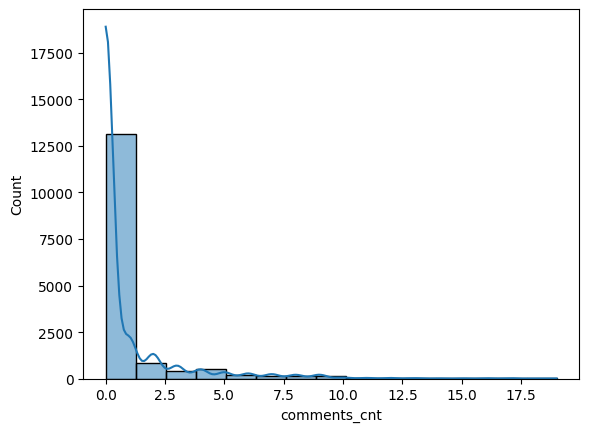

In [28]:
sns.histplot(df[df.comments_cnt<20]['comments_cnt'], kde=True)
plt.show()

–í —Ç–∞–∫–æ–º –¥–∏–∞–ø–∞–∑–æ–Ω–µ –º—ã –≤–∏–¥–∏–º —á–µ—Ç–∫–∏–π –ø–∏–∫ —É 0. –ê –¥–∞–ª–µ–µ —Å–Ω–∏–∂–µ–Ω–∏–µ –∫–æ–ª-–≤–∞ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤ –¥–æ 10. –î–∞–ª–µ–µ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–µ—Ç –ø–æ—Å—Ç–æ–≤. –ï–¥–∏–Ω–∏—á–Ω—ã–µ —Å—É—á–∞–∏.

In [29]:
df.comments_cnt.value_counts(dropna=False)

comments_cnt
0.0      11805
1.0       1336
2.0        822
3.0        434
4.0        312
         ...  
337.0        1
315.0        1
554.0        1
191.0        1
380.0        1
Name: count, Length: 255, dtype: int64

2/3 –ø–æ—Å—Ç–æ–≤ –±–µ–∑ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤.

# repost_cnt - –∫–æ–ª-–≤–æ —Ä–µ–ø–æ—Å—Ç–æ–≤.

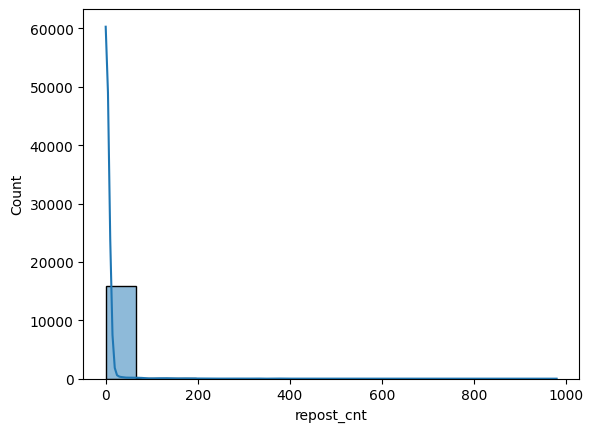

In [30]:
sns.histplot(df.repost_cnt, kde=True)
plt.show()

–¢—É—Ç —Ç–∞–∫–∂–µ —Å–µ—Ä—å–µ–∑–Ω—ã–µ –≤—ã–±—Ä–æ—Å—ã.

In [31]:
df[df.repost_cnt>20]

account_link search_keywords  \
8079   https://www.linkedin.com/in/tatberezka/recent-...               0   
8082   https://www.linkedin.com/in/tatberezka/recent-...               0   
8089   https://www.linkedin.com/in/agratoth/recent-ac...               0   
8092   https://www.linkedin.com/in/agratoth/recent-ac...               0   
8105   https://www.linkedin.com/in/agratoth/recent-ac...               0   
...                                                  ...             ...   
17256              https://www.linkedin.com/in/ma-popovv               0   
17257              https://www.linkedin.com/in/ma-popovv               0   
17258              https://www.linkedin.com/in/ma-popovv               0   
17259              https://www.linkedin.com/in/ma-popovv               0   
17260              https://www.linkedin.com/in/ma-popovv               0   

               name                                              title  \
8079              0  IT - recruiter (–∏—â—É —Å–∏—Å—Ç–µ–º–Ω—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫–æ–≤ –∏ –∏–Ω–∂...   
8082              0  IT - recruiter (–∏—â—É —Å–∏—Å—Ç–µ–º–Ω—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫–æ–≤ –∏ –∏–Ω–∂...   
8089              0                                     CTO/Co-founder   
8092              0                                     CTO/Co-founder   
8105              0                                     CTO/Co-founder   
...             ...                                                ...   
17256  Matvey Popov                        Software Engineer at Yandex   
17257  Matvey Popov                        Software Engineer at Yandex   
17258  Matvey Popov                        Software Engineer at Yandex   
17259  Matvey Popov                        Software Engineer at Yandex   
17260  Matvey Popov                        Software Engineer at Yandex   

      works_at intro  experience place  posts_cnt  \
8079         0     0         0.0     0        0.0   
8082         0     0         0.0     0        0.0   
8089         0     0         0.0     0        0.0   
8092         0     0         0.0     0        0.0   
8105         0     0         0.0     0        0.0   
...        ...   ...         ...   ...        ...   
17256   Yandex     0         0.0     0        0.0   
17257   Yandex     0         0.0     0        0.0   
17258   Yandex     0         0.0     0        0.0   
17259   Yandex     0         0.0     0        0.0   
17260   Yandex     0         0.0     0        0.0   

                                               post_text  reaction_cnt  \
8079   *–Ω–µ –ø–æ —Ä–∞–±–æ—á–µ–π —Ç–µ–º–µ*–î—Ä—É–∑—å—è, –æ—á–µ–Ω—å –Ω—É–∂–Ω–∞ –ø–æ–º–æ—â—å...       241.000   
8082   #looking_for_a_job#job –ò —Å–Ω–æ–≤–∞ –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ!)¬†...       227.000   
8089   –•–∞–π, –Ω–µ—Ç–≤–æ—Ä–∫!–¢—Ä–µ–±—É–µ—Ç—Å—è –ø–æ–º–æ—â—å –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω—ã—Ö...       316.000   
8092   –ö–æ–ª–ª–µ–≥–∏, –ø—Ä–æ—à—É —Ä–µ–ø–æ—Å—Ç!–ï—Å–ª–∏ –≤—ã, –±—É–¥—É—á–∏ –≥—Ä–∞–∂–¥–∞–Ω–∏...         1.606   
8105   –ö–æ–ª–ª–µ–≥–∏, –ø—Ä–æ—à—É —Ä–µ–ø–æ—Å—Ç.–û–¥–Ω–æ–π –∏–∑ —Ü–µ–ª–µ–π 2020 (–≤—Å–µ...         1.535   
...                                                  ...           ...   
17256                           #mood #relax #work #life         8.000   
17257  –£—Ä–∞, —Ç–æ–≤–∞—Ä–∏—â–∏. –ü–µ—Ä–≤—ã–π —Å–æ–±–µ—Å –≤ 2023 –≥–æ–¥—É —Å–æ—Å—Ç–æ—è...         3.000   
17258                            Quote of the day. #QOTD         6.000   
17259  How To Develop REST CRUD API Using Spring Boot...       635.000   
17260  I received a message from a lady who retired f...         1.000   

       comments_cnt  repost_cnt  
8079            9.0        25.0  
8082            6.0        48.0  
8089            0.0        40.0  
8092            0.0       112.0  
8105          449.0       165.0  
...             ...         ...  
17256         302.0        68.0  
17257           0.0        73.0  
17258          87.0       554.0  
17259           0.0        33.0  
17260         380.0       214.0  

[430 rows x 13 columns]

–ü–æ—Å—Ç–æ–≤ —Å —Ä–µ–ø–æ—Å—Ç–∞–º–∏ –±–æ–ª—å—à–µ 20 –≤—Å–µ–≥–æ 311.

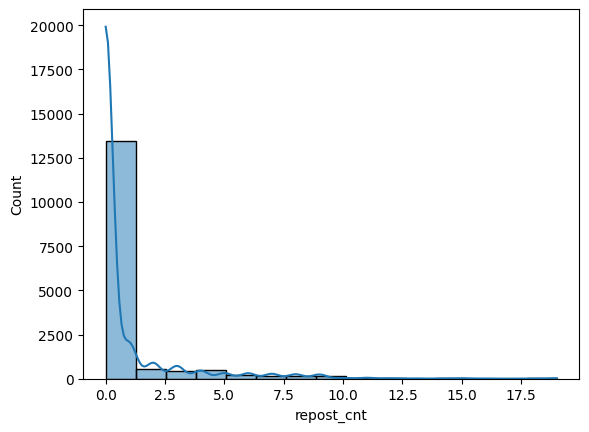

In [32]:
sns.histplot(df[df.repost_cnt<20]['repost_cnt'], kde=True)
plt.show()

–í —Ç–∞–∫–æ–º –¥–∏–∞–ø–∞–∑–æ–Ω–µ –º—ã –≤–∏–¥–∏–º —á–µ—Ç–∫–∏–π –ø–∏–∫ —É 0. –ê –¥–∞–ª–µ–µ —Å–Ω–∏–∂–µ–Ω–∏–µ –∫–æ–ª-–≤–∞ —Ä–µ–ø–æ—Å—Ç–æ–≤ –¥–æ 10. –î–∞–ª–µ–µ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–µ—Ç –ø–æ—Å—Ç–æ–≤. –ï–¥–∏–Ω–∏—á–Ω—ã–µ —Å—É—á–∞–∏.

In [33]:
df.repost_cnt.value_counts(dropna=False)

repost_cnt
0.0      12224
1.0       1209
2.0        549
3.0        442
4.0        279
         ...  
121.0        1
91.0         1
278.0        1
189.0        1
214.0        1
Name: count, Length: 256, dtype: int64

2/3 –ø–æ—Å—Ç–æ–≤ –±–µ–∑ —Ä–µ–ø–æ—Å—Ç–æ–≤.

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ä–µ–ø–æ—Å—Ç–æ–≤ –∏ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤ –æ—á–µ–Ω—å –ø–æ—Ö–æ–∂–∏. –ò–Ω–µ—Ç–µ—Ä–µ—Å–Ω–æ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å, –∫–∞–∫ –æ–Ω–∏ –∑–∞–≤–∏—Å—è—Ç –¥—Ä—É–≥ –æ—Ç –¥—Ä—É–≥–∞. –î–ª—è –æ—Ü–Ω–∫–∏ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–µ–π –≤–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è –¥–∞–Ω–Ω—ã–º–∏ –±–µ–∑ –≤—ã–±—Ä–æ—Å–æ–≤.

In [34]:
df_part =df[(df['comments_cnt']<20) & (df['reaction_cnt']<100) & (df['reaction_cnt']<20)]


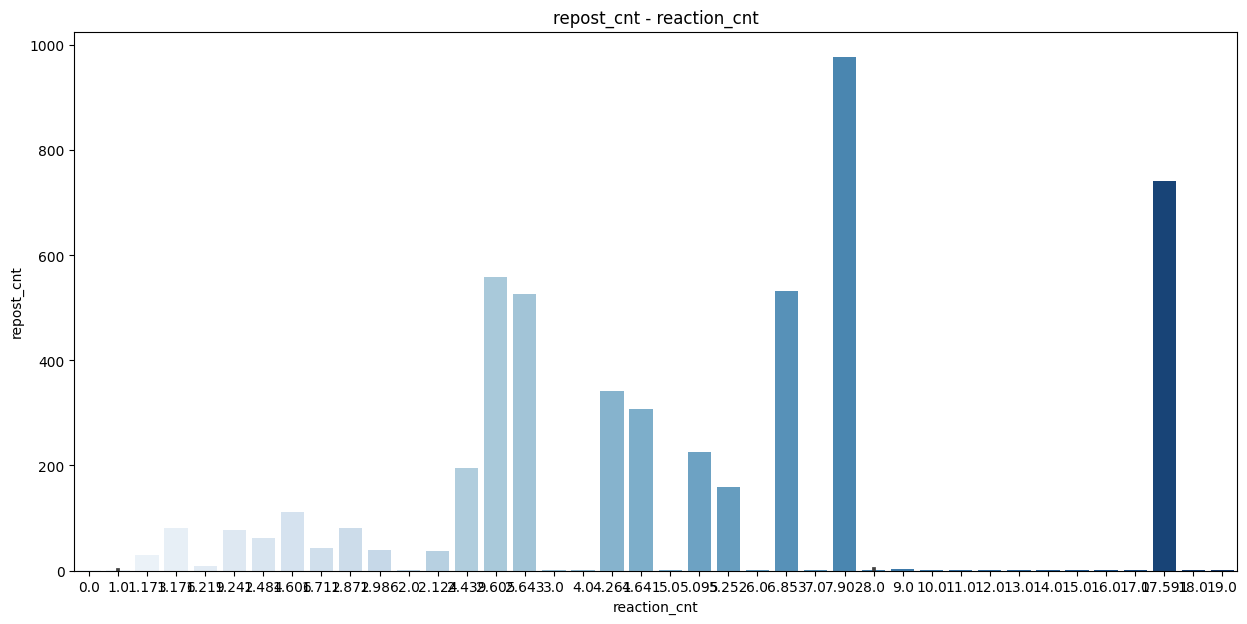

In [35]:
plt.figure(figsize=(15,7))
sns.barplot(x='reaction_cnt', y='repost_cnt', data = df_part, palette='Blues')
plt.title('repost_cnt - reaction_cnt')
plt.show()

–í—Å–µ —Ç–∞–∫–∂–µ –ª–æ–≥–∏—á–Ω–æ, —Å —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º –∫–æ–ª-–≤–∞ —Ä–µ–∞–∫—Ü–∏–π –Ω–∞ –ø–æ—Å—Ç, —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è –∫–æ–ª-–≤–æ —Ç–µ—Ö,–∫ —Ç–æ —Ä–µ–ø–æ—Å—Ç–∏—Ç.

–ü–æ—Å–º–æ—Ç—Ä–∏–º —Å–≤—è–∑–∞–Ω–æ –ª–∏ –∫–æ–ª-–≤–æ —Ä–µ–ø–æ—Å—Ç–æ–≤ —Å —Ä–µ–∞–∫—Ü–∏—è–º–∏.

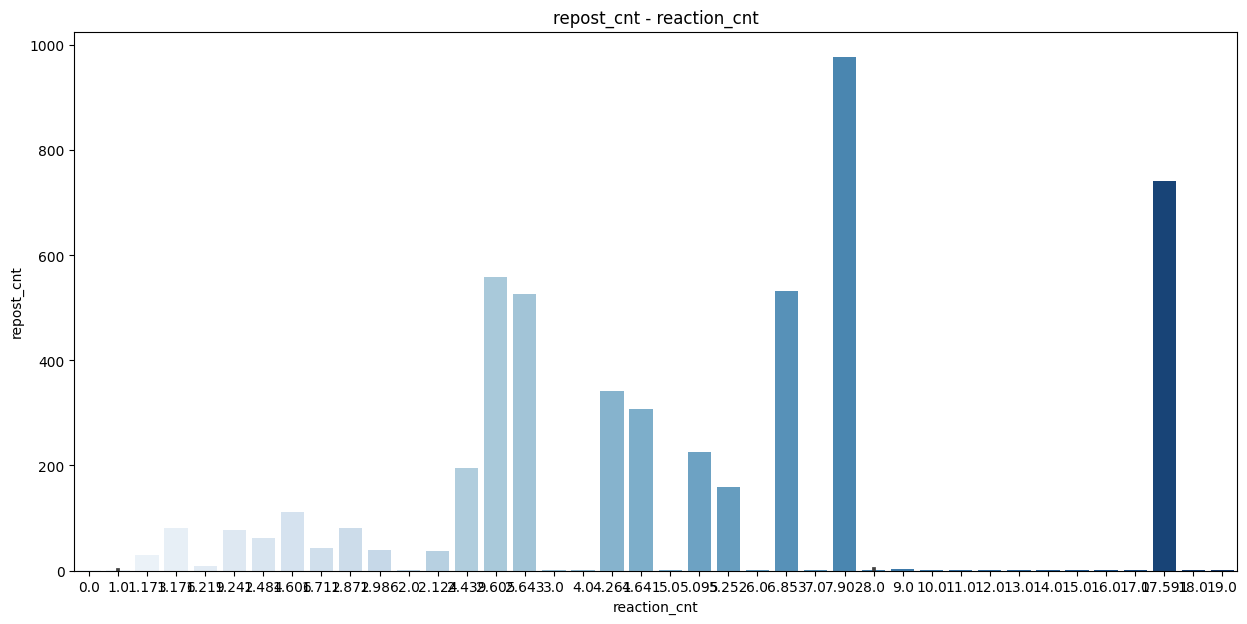

In [36]:
plt.figure(figsize=(15,7))
sns.barplot(x='reaction_cnt', y='repost_cnt', data = df_part, palette='Blues')
plt.title('repost_cnt - reaction_cnt')
plt.show()

–ü—Ä–æ–≤–µ—Ä–∏–º, –µ—Å—Ç—å –ª–∏ –≤ –¥–∞–Ω–Ω—ã—Ö —Ä–µ–∫—Ä—É—Ç–µ—Ä—ã.

In [37]:
df[df['title'].str.contains('Recruit')==True]

account_link  \
27     https://www.linkedin.com/in/ACoAAAqhWrQB8mmVQS...   
40     https://www.linkedin.com/in/ACoAABkz7KkBFOaZUx...   
639    https://www.linkedin.com/in/ACoAABkz7KkBFOaZUx...   
668    https://www.linkedin.com/in/ACoAAAfSmP0BPGYrNv...   
722    https://www.linkedin.com/in/ACoAAAqhWrQB8mmVQS...   
...                                                  ...   
18364  https://www.linkedin.com/in/ACoAAAEHeCMBgcmc0U...   
18365  https://www.linkedin.com/in/ACoAAAEHeCMBgcmc0U...   
18366  https://www.linkedin.com/in/ACoAAAEHeCMBgcmc0U...   
18367  https://www.linkedin.com/in/ACoAAAEHeCMBgcmc0U...   
18368  https://www.linkedin.com/in/maria-telenkova-38...   

            search_keywords                 name  \
27            lead frontend     Kristina Korobko   
40     middle test engineer  Anastasia Usoltseva   
639           lead frontend  Anastasia Usoltseva   
668           lead frontend       Lydia Saranina   
722           lead frontend     Kristina Korobko   
...                     ...                  ...   
18364                     0      Alla Afanasieva   
18365                     0      Alla Afanasieva   
18366                     0      Alla Afanasieva   
18367                     0      Alla Afanasieva   
18368                     0      Maria Telenkova   

                                                   title       works_at  \
27                                     Lead IT Recruiter      DreamTeam   
40           Senior Technical Recruiter (Armenia/Serbia)  Grid Dynamics   
639          Senior Technical Recruiter (Armenia/Serbia)  Grid Dynamics   
668    Technical Talent Huntress at Anchous Drive Rec...   ADDFORCE Inc   
722                                    Lead IT Recruiter      DreamTeam   
...                                                  ...            ...   
18364                       HR Specialist / IT Recruiter              0   
18365                       HR Specialist / IT Recruiter              0   
18366                       HR Specialist / IT Recruiter              0   
18367                       HR Specialist / IT Recruiter              0   
18368                                       IT-Recruiter              0   

                                                   intro  experience  \
27     ‚Ä¢\tkk@dream-team.tech‚Ä¢\tTelegram: @kkorobko‚Ä¢\t...         8.0   
40     With nearly 5 years of experience in IT recrui...         9.0   
639    With nearly 5 years of experience in IT recrui...         9.0   
668    9+ years of experience as a Full Cycle Technic...        13.0   
722    ‚Ä¢\tkk@dream-team.tech‚Ä¢\tTelegram: @kkorobko‚Ä¢\t...         8.0   
...                                                  ...         ...   
18364                                                  0         0.0   
18365                                                  0         0.0   
18366                                                  0         0.0   
18367                                                  0         0.0   
18368                                                  0         0.0   

                              place  posts_cnt  \
27                           –†–æ—Å—Å–∏—è        0.0   
40                  –ë–µ–ª–≥—Ä–∞–¥, –°–µ—Ä–±–∏—è        0.0   
639                 –ë–µ–ª–≥—Ä–∞–¥, –°–µ—Ä–±–∏—è        0.0   
668    –û–±–ª–∞—Å—Ç—å –∑–∞–ª–∏–≤–∞ –°–∞–Ω-–§—Ä–∞–Ω—Ü–∏—Å–∫–æ        0.0   
722                          –†–æ—Å—Å–∏—è        0.0   
...                             ...        ...   
18364                             0        0.0   
18365                             0        0.0   
18366                             0        0.0   
18367                             0        0.0   
18368                             0        0.0   

                                               post_text  reaction_cnt  \
27                                                     0           0.0   
40                                                     0           0.0   
639                               

–ï—Å—Ç—å —Ç–∞–∫–∏–µ. –ü–æ—Å–º–æ—Ç—Ä–∏–º —Å–∫–æ–ª—å–∫–æ —Ç–∞–∫–∏—Ö –∞–∫–∫–∞—É–Ω—Ç–æ–≤.

In [38]:
len(df[df['title'].str.contains('Recruiter')==True])

612

–ü–æ—á–∏—Å—Ç–∏–º –¥–∞–Ω–Ω—ã–µ –æ—Ç —Ä–µ–∫—Ä—É—Ç–µ—Ä–æ–≤.

In [39]:
df = df[df['title'].str.contains('Recruiter')==False]

In [40]:
df.shape

(15498, 13)

In [41]:
df.account_link.nunique()

1890

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –¥–æ–ª–∂–Ω–æ—Å—Ç–∏ –Ω–∞—à–∏—Ö —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–æ–≤.

In [42]:
df.title.unique()

array(['Senior Web Developer - IBS InfinitySoft',
       'LOOKING FOR "Senior/Lead Frontend (React) Developer" VACANCY',
       'Data Analyst at X5 Group', ...,
       'Lead iOS developer at Yandex Travel', 'Lead iOS-developer',
       'iOS Developer at Tinkoff Digital'], dtype=object)

In [43]:
mistakes=['–ò—â—É —Å—Ä–æ—á–Ω–æ: –ì–ª–∞–≤–Ω–æ–≥–æ –≥–µ–æ–ª–æ–≥–∞ (–∏–∑—ã—Å–∫–∞–Ω–∏—è)! –õ–æ–∫–∞—Ü–∏—è -–ú–æ—Å–∫–≤–∞ –ª–∏–±–æ –¢–æ–ª—å—è—Ç—Ç–∏', '17000+ | –ö–æ–º–ø–ª–µ–∫—Å–Ω–∞—è –ø–æ–º–æ—â—å –≤ –ø–æ–∏—Å–∫–µ —Ä–∞–±–æ—Ç—ã | im-konsalting.ru  | mail@im-konsalting.ru | WhatsApp/Telegram: 79643223069',
            '–†—É–∫–æ–≤–æ–¥–∏—Ç–µ–ª—å –ø–æ–¥—Ä–∞–∑–¥–µ–ª–µ–Ω–∏–π –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–∞ –∏ —Å—Ç—Ä–∞—Ç–µ–≥–∏—á–µ—Å–∫–æ–≥–æ —Ä–∞–∑–≤–∏—Ç–∏—è –≤ –∫—Ä—É–ø–Ω—ã—Ö –∫–æ–º–ø–∞–Ω–∏—è—Ö –Ω–∞ B2C —Ä—ã–Ω–∫–µ | 11 000+','–°—Ç—Ä–æ—é –∫—Ä—É—Ç—ã–µ –æ—Ç–¥–µ–ª—ã –ø—Ä–æ–¥–∞–∂. –û–±—É—á–∞—é –≤ —Ñ–æ—Ä–º–∞—Ç–µ ¬´–†–µ–∞–ª–∏—Ç–∏¬ª. –Ø - –í–ª–∞–¥–∏–º–∏—Ä –Ø–∫—É–±–∞',
            '–°–ø–µ—Ü–∏–∞–ª–∏—Å—Ç –ø–æ –Ω–∞–π–º—É –ø–µ—Ä—Å–æ–Ω–∞–ª–∞ ‚Äì V Kontakte LLC',]
df=df.query('title not in @mistakes')

–ò—Ç–æ–≥–æ  –Ω–∞—à –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–π —Ñ–∞–π–ª:

In [44]:
df.shape

(15476, 13)

–≠—Ç–æ 9277 —Å—Ç—Ä–æ–∫.

In [45]:
df.account_link.nunique()

1885

1067  —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π.

In [46]:
df

account_link  \
0      https://www.linkedin.com/in/varvara-kulmeteva-...   
1                   https://www.linkedin.com/in/rauventa   
2           https://www.linkedin.com/in/denis-kuchkildin   
3      https://www.linkedin.com/in/ACoAAC4yJzEB4TjXkJ...   
4             https://www.linkedin.com/in/oleg-malyshkin   
...                                                  ...   
18699  https://www.linkedin.com/in/sergey-cheliuskin-...   
18700           https://www.linkedin.com/in/nick-puchko/   
18701  https://www.linkedin.com/in/nikita-susoev-40b7...   
18702  https://www.linkedin.com/in/ivan-sergunin-2676...   
18703  https://www.linkedin.com/in/igor-shvetsov-6a08...   

            search_keywords                      name  \
0      senior web developer         Varvara Kulmeteva   
1           senior frontend            Ilya Moiseenko   
2       middle data analyst          Denis Kuchkildin   
3        senior ML engineer              Ian Silantev   
4      senior test engineer            Oleg Malyshkin   
...                     ...                       ...   
18699                     0  Sergey Cheliuskin-Galich   
18700                     0            Nikolai Puchko   
18701                     0             Nikita Susoev   
18702                     0             Ivan Sergunin   
18703                     0             Igor Shvetsov   

                                                   title   works_at  \
0                Senior Web Developer - IBS InfinitySoft        IBS   
1      LOOKING FOR "Senior/Lead Frontend (React) Deve...  Centicore   
2                               Data Analyst at X5 Group   X5 Group   
3      MSc Data Science in University of East London ...  Neurospot   
4         Senior Test Automation Engineer at GlobalLogic          0   
...                                                  ...        ...   
18699                                      iOS Developer          0   
18700                Lead iOS developer at Yandex Travel          0   
18701                                 Lead iOS-developer          0   
18702                          iOS Developer at Sberbank          0   
18703                   iOS Developer at Tinkoff Digital          0   

                                                   intro  experience  \
0      –ù–∞–≤—ã–∫–∏: ReactJS ¬∑ JavaScript ¬∑ HTML ¬∑ CSS–ù–∞–≤—ã–∫...        10.0   
1      Ilya, React Developer from Moscow.Ilya, React ...         8.0   
2      I have a strong engineering background and mor...         6.0   
3      Absolutely in love with Data Science, AI and M...         2.0   
4      Hi everyone, I am Oleg Malyshkin - Senior Test...         4.0   
...                                                  ...         ...   
18699                                                  0         0.0   
18700                                                  0         0.0   
18701                                                  0         0.0   
18702                                                  0         0.0   
18703                                                  0         0.0   

                                    place  posts_cnt  \
0      –ú–æ—Å–∫–≤–∞, –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –†–æ—Å—Å–∏—è        0.0   
1                  –ú–æ—Å–∫–≤–∞, –ú–æ—Å–∫–≤–∞, –†–æ—Å—Å–∏—è        1.0   
2                  –ú–æ—Å–∫–≤–∞, –ú–æ—Å–∫–≤–∞, –†–æ—Å—Å–∏—è        1.0   
3                         –¢–±–∏–ª–∏—Å–∏, –ì—Ä—É–∑–∏—è        0.0   
4                     –ö–∏–µ–≤, –ö–∏–µ–≤, –£–∫—Ä–∞–∏–Ω–∞        9.0   
...                                   ...        ...   
18699                                   0        1.0   
18700                                   0        0.0   
18701                                   0        0.0   
18702                                   0        0.0   
18703                                   0        0.0   

                                               post_text  reaction_cnt  \
0                                                      0          

## –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ —Ç–µ–∫—Å—Ç–æ–≤

–¢–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—é –∏ –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—é —Ç–µ–∫—Å—Ç–æ–≤.

In [47]:
model = spacy.load('ru_core_news_sm', disable=['ner', 'parser'])

–°–∫–ª–∞–¥—ã–≤–∞–µ–º –≤—Å–µ –ø–æ—Å—Ç—ã –≤ –æ–¥–∏–Ω —Å–ø–∏—Å–æ–∫

In [48]:
df["post_text"]  = df["post_text"] .astype('str')

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –∫–æ–ª-–≤–æ —Å–∏–º–≤–æ–ª–æ–≤ –≤ –ø–æ—Å—Ç–∞—Ö.

In [49]:
df["symbols"] = [len(x) for x in df['post_text']]

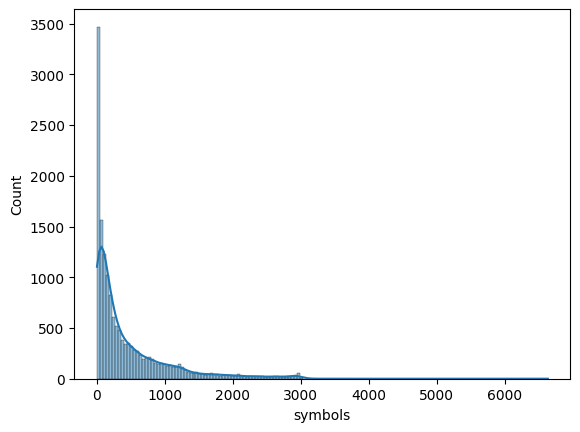

In [50]:
sns.histplot(df.symbols, kde=True)
plt.show()

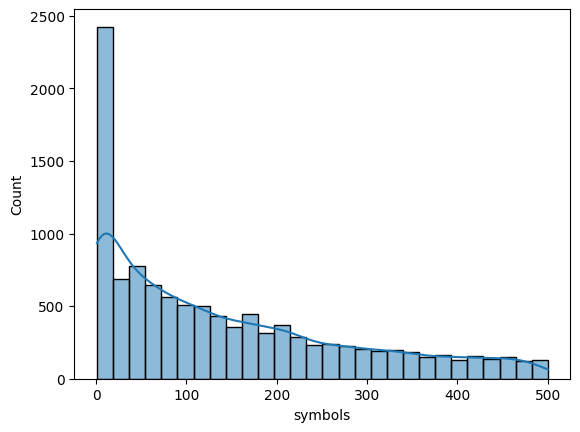

In [51]:
sns.histplot(df[df.symbols<=500].symbols, kde=True)
plt.show()

–ü–æ—Å–º–æ—Ç—Ä–∏–º –∫–æ–ª-–≤–æ –ø–æ—Å—Ç–æ–≤ —Å —Ç–µ–∫—Å—Ç–æ–º –¥–æ 100 —Å–∏–º–≤–æ–ª–æ–≤.

In [52]:
df[df.symbols<=50]

account_link  \
0      https://www.linkedin.com/in/varvara-kulmeteva-...   
3      https://www.linkedin.com/in/ACoAAC4yJzEB4TjXkJ...   
10            https://www.linkedin.com/in/oleg-malyshkin   
11            https://www.linkedin.com/in/oleg-malyshkin   
13     https://www.linkedin.com/in/andrew-sergeev-70b...   
...                                                  ...   
18698      https://www.linkedin.com/in/alexey-artyushin/   
18700           https://www.linkedin.com/in/nick-puchko/   
18701  https://www.linkedin.com/in/nikita-susoev-40b7...   
18702  https://www.linkedin.com/in/ivan-sergunin-2676...   
18703  https://www.linkedin.com/in/igor-shvetsov-6a08...   

            search_keywords               name  \
0      senior web developer  Varvara Kulmeteva   
3        senior ML engineer       Ian Silantev   
10     senior test engineer     Oleg Malyshkin   
11     senior test engineer     Oleg Malyshkin   
13       senior QA engineer     Andrew Sergeev   
...                     ...                ...   
18698                     0   Alexey Artyushin   
18700                     0     Nikolai Puchko   
18701                     0      Nikita Susoev   
18702                     0      Ivan Sergunin   
18703                     0      Igor Shvetsov   

                                                   title  \
0                Senior Web Developer - IBS InfinitySoft   
3      MSc Data Science in University of East London ...   
10        Senior Test Automation Engineer at GlobalLogic   
11        Senior Test Automation Engineer at GlobalLogic   
13                    Senior QA Engineer - Deutsche Bank   
...                                                  ...   
18698                     Senior IOS Developer - Tinkoff   
18700                Lead iOS developer at Yandex Travel   
18701                                 Lead iOS-developer   
18702                          iOS Developer at Sberbank   
18703                   iOS Developer at Tinkoff Digital   

                                                works_at  \
0                                                    IBS   
3                                              Neurospot   
10                                                     0   
11                                                     0   
13     –ú–æ—Å–∫–æ–≤—Å–∫–∏–π –ì–æ—Å—É–¥–∞—Ä—Å—Ç–≤–µ–Ω–Ω—ã–π –ò–Ω—Å—Ç–∏—Ç—É—Ç –†–∞–¥–∏–æ—Ç–µ—Ö–Ω–∏...   
...                                                  ...   
18698                                                  0   
18700                                                  0   
18701                                                  0   
18702                                                  0   
18703                                                  0   

                                                   intro  experience  \
0      –ù–∞–≤—ã–∫–∏: ReactJS ¬∑ JavaScript ¬∑ HTML ¬∑ CSS–ù–∞–≤—ã–∫...        10.0   
3      Absolutely in love with Data Science, AI and M...         2.0   
10     Hi everyone, I am Oleg Malyshkin - Senior Test...         4.0   
11     Hi everyone, I am Oleg Malyshkin - Senior Test...         4.0   
13     - Test plan design - Test cases implementation...        12.0   
...                                                  ...         ...   
18698                                                  0         0.0   
18700                                                  0         0.0   
18701                                                  0         0.0   
18702                                                  0         0.0   
18703                                                  0         0.0   

                                    place  posts_cnt   post_text  \
0      –ú–æ—Å–∫–≤–∞, –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –†–æ—Å—Å–∏—è        0.0           0   
3                         –¢–±–∏–ª–∏—Å–∏, –ì—Ä—É–∑–∏—è        0.0           0   
10                    –ö–∏–µ–≤, –ö–∏–µ–≤, –£–∫—Ä–∞–∏–Ω–∞        9.0           0   
11                    –ö–∏–µ–

865 —Å—Ç—Ä–æ–∫. –ü–æ—Å–º–æ—Ç—Ä–∏–º, —á—Ç–æ —ç—Ç–æ –∑–∞ –ø–æ—Å—Ç—ã.

In [53]:
df[df.symbols<=50]['post_text'].unique()

array(['0', '–ö-–∫–æ–≤–∞—Ä—Å—Ç–≤–æ)))', '–í—Å–µ–º –±–æ–¥—Ä–æ–≥–æ —É—Ç—Ä–∞ —Å—Ä–µ–¥—ã!', ...,
       'https://lnkd.in/grs_CJv Alex Bush',
       "Time has come. I'm open to new opportunities.", ')))'],
      dtype=object)

–ö–∞–∂–µ—Ç—Å—è, —á—Ç–æ –æ—Ç —Ç–∞–∫–∏—Ö –ø–æ—Å—Ç–æ–≤ —Ç–æ—á–Ω–æ –º–æ–∂–Ω–æ –∏–∑–±–∞–≤–∏—Ç—å—Å—è.

In [54]:
df =df[df.symbols>=50]

–ü–æ—Å–º–æ—Ç—Ä–∏–º –≤–∏–∑—É–∞–ª—å–Ω–æ –Ω–∞–∏–±–æ–ª–µ–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–Ω—ã–µ —Å–ª–æ–≤–∞ –≤ —Ç–µ–∫—Å—Ç–∞—Ö.

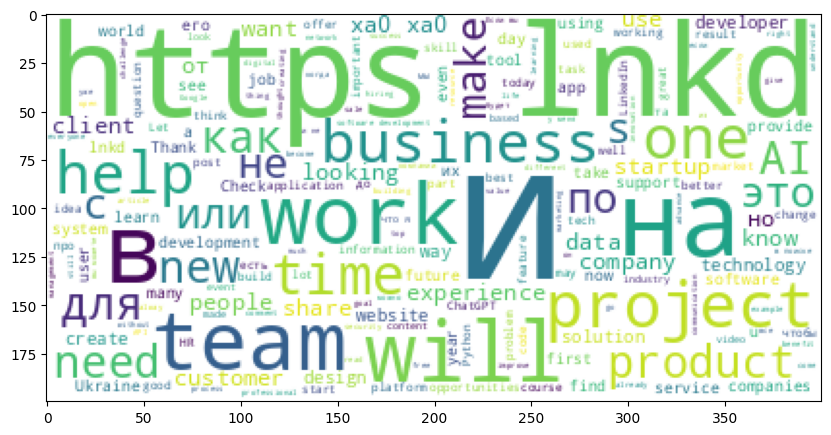

In [55]:
long_string = ','.join(list(df['post_text'].values))

wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

plt.figure(figsize=(10,15))

wordcloud.generate(long_string)

plt.imshow(wordcloud)

In [56]:
texts = df["post_text"].tolist()

–í—ã–ø–æ–ª–Ω—è–µ–º –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—é —Ç–µ–∫—Å—Ç–æ–≤.

In [57]:
res = []
for doc in model.pipe(texts, disable=["tagger", "parser"]):
    res.append([token.lemma_ for token in doc])

In [58]:
with open("lemmas.json", "w") as fid:
    json.dump({"lemmas": res}, fid)



–£–¥–∞–ª–∏–º –∑–Ω–∞–∫–∏ –ø—Ä–µ–ø–∏–Ω–∞–Ω–∏—è, —Ü–∏—Ñ—Ä—ã –∏ —Å–ª–æ–≤–∞, —Å–æ–¥–µ—Ä–∂–∞—â–∏–µ —Ü–∏—Ñ—Ä—ã. –î–ª—è —ç—Ç–æ —Å–æ–±–µ—Ä—ë–º —Ä–µ–≥—É–ª—è—Ä–Ω–æ–µ –≤—ã—Ä–∞–∂–µ–Ω–∏–µ, –∫–æ—Ç–æ—Ä–æ–µ –ø–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è –ª—é–±–æ–≥–æ —Å–ª–æ–≤–∞, —Å–æ—Å—Ç–æ—è—â–µ–≥–æ –∏–∑ –±—É–∫–≤ –∫–∏—Ä–∏–ª–∏—Ü—ã.



In [59]:
word_pattern = re.compile("^[–∞-—è–ê-–Ø—ë–Å]*$")

In [60]:
def remove_symbols(doc):
    return [token for token in doc if word_pattern.match(token)]

In [61]:
corpus = list(map(remove_symbols, res))

## –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–æ–≤

–ß—Ç–æ–±—ã —É–º–µ–Ω—å—à–∏—Ç—å —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –ø–æ–ª—É—á–∞–µ–º–æ–π –º–∞—Ç—Ä–∏—Ü—ã, –¥–æ–±–∞–≤–∏–º –∏—Å–∫–ª—é—á–µ–Ω–∏–µ —Å—Ç–æ–ø-—Å–ª–æ–≤.

In [62]:
stop_words = stopwords.words('russian')
print(stop_words)

['–∏', '–≤', '–≤–æ', '–Ω–µ', '—á—Ç–æ', '–æ–Ω', '–Ω–∞', '—è', '—Å', '—Å–æ', '–∫–∞–∫', '–∞', '—Ç–æ', '–≤—Å–µ', '–æ–Ω–∞', '—Ç–∞–∫', '–µ–≥–æ', '–Ω–æ', '–¥–∞', '—Ç—ã', '–∫', '—É', '–∂–µ', '–≤—ã', '–∑–∞', '–±—ã', '–ø–æ', '—Ç–æ–ª—å–∫–æ', '–µ–µ', '–º–Ω–µ', '–±—ã–ª–æ', '–≤–æ—Ç', '–æ—Ç', '–º–µ–Ω—è', '–µ—â–µ', '–Ω–µ—Ç', '–æ', '–∏–∑', '–µ–º—É', '—Ç–µ–ø–µ—Ä—å', '–∫–æ–≥–¥–∞', '–¥–∞–∂–µ', '–Ω—É', '–≤–¥—Ä—É–≥', '–ª–∏', '–µ—Å–ª–∏', '—É–∂–µ', '–∏–ª–∏', '–Ω–∏', '–±—ã—Ç—å', '–±—ã–ª', '–Ω–µ–≥–æ', '–¥–æ', '–≤–∞—Å', '–Ω–∏–±—É–¥—å', '–æ–ø—è—Ç—å', '—É–∂', '–≤–∞–º', '–≤–µ–¥—å', '—Ç–∞–º', '–ø–æ—Ç–æ–º', '—Å–µ–±—è', '–Ω–∏—á–µ–≥–æ', '–µ–π', '–º–æ–∂–µ—Ç', '–æ–Ω–∏', '—Ç—É—Ç', '–≥–¥–µ', '–µ—Å—Ç—å', '–Ω–∞–¥–æ', '–Ω–µ–π', '–¥–ª—è', '–º—ã', '—Ç–µ–±—è', '–∏—Ö', '—á–µ–º', '–±—ã–ª–∞', '—Å–∞–º', '—á—Ç–æ–±', '–±–µ–∑', '–±—É–¥—Ç–æ', '—á–µ–≥–æ', '—Ä–∞–∑', '—Ç–æ–∂–µ', '—Å–µ–±–µ', '–ø–æ–¥', '–±—É–¥–µ—Ç', '–∂', '—Ç–æ–≥–¥–∞', '–∫—Ç–æ', '—ç—Ç–æ—Ç', '—Ç–æ–≥–æ', '–ø–æ—Ç–æ–º—É', '—ç—Ç–æ–≥–æ', '–∫–∞–∫–æ–π', '—Å–æ–≤—Å–µ–º', '–Ω–∏–º', '–∑

–¢.–µ. TfIdfVectorizer –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –Ω–∞ –≤—Ö–æ–¥ —Å–ø–∏—Å–æ–∫ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–π, –ø–æ—ç—Ç–æ–º—É –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –æ–±—ä–µ–¥–∏–Ω–∏—Ç—å —Å–ø–∏—Å–∫–∏ —Å–ª–æ–≤, —Å–æ—Å—Ç–∞–≤–ª—è—é—â–∏—Ö –∫–æ—Ä–ø—É—Å, –≤ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è.

In [63]:
tfidf = TfidfVectorizer(stop_words=stop_words)

In [64]:
docs = [" ".join(tokens) for tokens in corpus]
docs[:3]

['—è —Ç–æ–ª—å–∫–æ —á—Ç–æ –∑–Ω–∞—á–æ–∫ –∑–∞ –Ω–∞–≤—ã–∫ –∫—Ç–æ —Ö–æ—Ç–µ—Ç—å –±—ã—Ç—å —Å–ª–µ–¥—É—é—â–∏–π –ø—Ä–æ–π—Ç–∏ —Ç–µ—Å—Ç –Ω–∞ –ø—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞–≤—ã–∫',
 '',
 '']

In [65]:
docs = list(filter(None, docs))

–ü—Ä–æ–≤–µ–¥–µ–º —Å—Ç–µ–º–º–∏–Ω–≥ —Ç–µ–∫—Å—Ç–æ–≤.

In [66]:
from pymystem3 import Mystem
from tqdm import tqdm
m = Mystem()
stemmed = set()
voc_len = len(docs)
for i in tqdm(range(voc_len)):
    word = docs.pop()
    stemmed_word = m.lemmatize(word)[0]
    stemmed.add(stemmed_word)

stemmed = list(stemmed)

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4724/4724 [00:22<00:00, 211.94it/s]


In [67]:
x = tfidf.fit_transform(stemmed)

In [68]:
x.shape

(1104, 1023)

–¢–µ–ø–µ—Ä—å —Å–æ—Å—Ç–∞–≤–∏–º —Å–ª–æ–≤–∞—Ä—å

In [69]:
id2word = {i: token for i, token in enumerate(tfidf.get_feature_names_out())}

## LDA

–¢–µ–ø–µ—Ä—å –º–æ–∂–µ–º –∑–∞–ø—É—Å—Ç–∏—Ç—å –∞–ª–≥–æ—Ä–∏—Ç–º LDA. –ó–∞–¥–∞–¥–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–µ–º —Ä–∞–≤–Ω–æ–µ 5.

In [70]:
n_topics = 6

In [71]:
lda = LatentDirichletAllocation(n_components=n_topics, random_state=31,max_iter=20,n_jobs=6, learning_method='batch',verbose=1)

In [72]:
topics = lda.fit_transform(x)

iteration: 1 of max_iter: 20
iteration: 2 of max_iter: 20
iteration: 3 of max_iter: 20
iteration: 4 of max_iter: 20
iteration: 5 of max_iter: 20
iteration: 6 of max_iter: 20
iteration: 7 of max_iter: 20
iteration: 8 of max_iter: 20
iteration: 9 of max_iter: 20
iteration: 10 of max_iter: 20
iteration: 11 of max_iter: 20
iteration: 12 of max_iter: 20
iteration: 13 of max_iter: 20
iteration: 14 of max_iter: 20
iteration: 15 of max_iter: 20
iteration: 16 of max_iter: 20
iteration: 17 of max_iter: 20
iteration: 18 of max_iter: 20
iteration: 19 of max_iter: 20
iteration: 20 of max_iter: 20


In [73]:
topics.shape

(1104, 6)

### –ö–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞

–¢–µ–ø–µ—Ä—å –∏–∑–≤–ª–µ—á—ë–º –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞ –¥–ª—è –∫–∞–∂–¥–æ–π –∏–∑ 5 —Ç–µ–º. –í —Å–≤–æ–π—Å—Ç–µ _components_ _ –ª–µ–∂–∏—Ç –º–∞—Ç—Ä–∏—Ü–∞ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏—è —Å–ª–æ–≤ —Ç–µ–º–∞–º. –ü—Ä–æ–π–¥—ë–º—Å—è –ø–æ –∫–∞–∂–¥–æ–π –∏–∑ 5 –≤—ã–¥–µ–ª–µ–Ω–Ω—ã—Ö —Ç–µ–º –∏ –¥–ª—è –∫–∞–∂–¥–æ–π –≤–æ–∑—å–º—ë–º –¢–û–ü-20 —Å–ª–æ–≤.

–ü–æ –æ—á–µ—Ä–µ–¥–∏ –ø—Ä–æ–π–¥—ë–º—Å—è –ø–æ –∫–∞–∂–¥–æ–π —Ç–µ–º–µ (–ø–µ—Ä–≤–æ–µ –∏–∑–º–µ—Ä–µ–Ω–∏–µ –º–∞—Å—Å–∏–∞) –∏ –≤—ã–±–µ—Ä–µ–º –¢–û–ü-20 —Å–ª–æ–≤, –Ω–∞–∏–±–æ–ª–µ–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–Ω—ã—Ö –¥–ª—è —ç—Ç–æ–π —Ç–µ–º—ã. –ü–æ—Ç–æ–º –ø–æ –∏–Ω–¥–µ–∫—Å—É —Å–ª–æ–≤–∞ –æ–±—Ä–∞—Ç–∏–º—Å—è –∫ —Å–ª–æ–≤–∞—Ä—é –∏ —É–∑–Ω–∞–µ–º, —á—Ç–æ —ç—Ç–æ –∑–∞ —Å–ª–æ–≤–æ.

In [74]:
for i in range(n_topics):
    c = lda.components_[i, :]
    topic_tokens = [id2word.get(token_id) for token_id in np.argsort(c)[-20:]]
    print("–¢–µ–º–∞",i+1, ":")
    print(", ".join(topic_tokens))
    print("\n ")

–¢–µ–º–∞ 1 :
–Ω–µ–±–æ–ª—å—à–æ–π, –º–Ω–æ–≥–∏–µ, –º–æ–¥—É–ª—å–Ω—ã–π, –ø–ª—é—Å, –∫–æ–Ω—Å—É–ª—å—Ç–∞—Ü–∏—è, –∏–∑—è, —Å–æ–±—ã—Ç–∏–µ, –¥–∂—É–Ω–∞, –∞–≤—Ç–æ–≤–æ–∑, –∫–æ–º–º–µ—Ä—á–µ—Å–∫–∏–π, –ø–æ—Å—Ç–∞–≤–ª—è—Ç—å, —è–Ω–≤–∞—Ä—Å–∫–∏–π, —Ç—Ä–∞–≤–Ω—è, –ø–æ–º–∏–º–æ, –ø–æ–ø–æ–≤–Ω–µ–Ω–Ω–∏–π, –∫–æ—Ä–æ—Ç—à–∞, –º–æ–Ω–µ—Ç–∏–∑–∞—Ü–∏—è, –≤–Ω–µ, –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç—å, –≤—á–µ—Ä–∞

 
–¢–µ–º–∞ 2 :
–ø—Ä–∏–¥–µ—Ä–∂–∏–≤–∞—Ç—å—Å—è, —Ä—ã—Ö—Ç—É–π, –∑–∞–¥—É–º—ã–≤–∞—Ç—å—Å—è, –ª–∞–π—Ñ—Ö–∞–∫, —è–∫—â–æ, –¥–µ–ª–∏—Ç—å—Å—è, —Ñ–µ–≤—Ä–∞–ª—å, –ø—Ä–∏—Ö–æ–¥–∏—Ç—å, –º–∏–Ω—É—Ç—å, –ø–∏—Å–∞—Ç—å, –∫–∏—Ä–∏–ª–ª, –∞–∫, –ª–µ–Ω—Ç–∞, –æ—Ç—ä–µ–∑–∂–∞—Ç—å, –ø–æ–¥—è–∫—É–≤–∞—Ç—å, –Ω–µ–¥–æ—Å—Ç–∞—á–∞, –∫–æ–∂–Ω—ã–π, –ø–æ–¥–±–æ—Ä–æ—á–∫–∞, —à—Ç–æ—à, –ø–æ–∑–≤–æ–ª—è—Ç—å

 
–¢–µ–º–∞ 3 :
—Å–ª—É—á–∞–π–Ω–æ, —Å–æ–≥–ª–∞—Å–Ω—ã–π, —Å–µ—Ä–≤–∏—Å, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—Ç—å, –¥–æ–µ–∑–∂–∞—Ç—å, –º–µ—Å—è—Ü, –∑–∞–ø—É—Å–∫, –¥–µ–ª–µ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ, –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ, –ø—Ä–∏—Å–ø–∏—á–∏—Ç—å, –ø–æ–ø—É–≥–∞–π, –±–µ—Å–ø–ª–∞—Ç–Ω—ã–π, —Ö–≤–∞—Å—Ç, –∑–∞–¥–∞–≤–∞—Ç—å, —á–∞—Å—

–ü–æ –ø–æ–ª—É—á–µ–Ω–Ω—ã–º –∫–ª—é—á–µ–≤—ã–º —Å–ª–æ–≤–∞–º –º–æ–∂–Ω–æ —Å–æ—Å—Ç–∞–≤–∏—Ç—å –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –æ —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–∏ —Ç–æ–π –∏–ª–∏ –∏–Ω–æ–π —Ç–µ–º—ã. –•–æ—Ç—è –∏–Ω–æ–≥–¥–∞ —Å–æ—á–µ—Ç–∞–Ω–∏—è —Å–ª–æ–≤ –¥–æ–≤–æ–ª—å–Ω–æ —Å—Ç—Ä–∞–Ω–Ω—ã–µ )  

### –¢–∏–ø–∏—á–Ω—ã–µ —Å—Ç–∞—Ç—å–∏

–¢–µ–ø–µ—Ä—å –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã –≤–æ–∑—å–º—ë–º –ø–æ –æ–¥–Ω–æ–º—É –¥–æ–∫—É–º–µ–Ω—Ç—É, –∫–æ—Ç–æ—Ä—ã–π —Ö–æ—Ä–æ—à–æ —Å–æ–æ—Ç–≤–µ—Ç—Å–≤—É–µ—Ç —ç—Ç–æ–π —Ç–µ–º–µ. –î–ª—è —ç—Ç–æ–≥–æ –∑–∞–≥–ª—è–Ω–µ–º –≤ –º–∞—Å—Å–∏–≤ _topics_.

In [75]:
for i in range(n_topics):
    doc_id = np.argmax(topics[:, i])
    print("–¢–µ–º–∞ ", i)
    print(df.iloc[doc_id]["post_text"])
    print("\n")

–¢–µ–º–∞  0
Revolutionize Your Business Workflow with Amwork: The All-in-One PlatformMeet Amwork, the ultimate multitool platform designed to cater to all your business needs. With a powerful builder that enables you to create a unique workspace tailored to your company's requirements, Amwork offers an extensive range of modules, such as CRM, project management, HR, and more. By streamlining business processes and enhancing collaboration, Amwork ensures a seamless experience for employees and partners alike. Boasting a user-friendly setup with no coding required, Amwork is the go-to solution for companies seeking to optimize their workflow and boost productivity.The Issue:Drawing on six years of experience as a system integrator, I've observed that over 60% of small and medium-sized businesses grapple with the absence of a universal software to manage all their processes. Consequently, they resort to using multiple applications, which often leads to unreliable integrations and user dis

# –£–ª—É—á—à–∏–º –º–æ–¥–µ–ª—å. –ë—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å Gensim.

–ü—Ä–æ–≤–µ–¥–µ–º –æ—á–∏—Å—Ç–∫—É —Ç–µ–∫—Å—Ç–∞.

In [76]:

data = df.post_text.values.tolist()

data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

data = [re.sub('\s+', ' ', sent) for sent in data]

data = [re.sub("\'", "", sent) for sent in data]
data = [re.sub("^[–∞-—è–ê-–Ø—ë–Å]*$",' ', sent) for sent in data]
pprint(data[:1])

['–Ø —Ç–æ–ª—å–∫–æ —á—Ç–æ –ø–æ–ª—É—á–∏–ª(–∞) –∑–Ω–∞—á–æ–∫ –∑–∞ –Ω–∞–≤—ã–∫ ¬´JavaScript¬ª. –ö—Ç–æ —Ö–æ—á–µ—Ç –±—ã—Ç—å '
 '—Å–ª–µ–¥—É—é—â–∏–º? –ü—Ä–æ–π–¥–∏—Ç–µ —Ç–µ—Å—Ç –Ω–∞ –ø—Ä–æ–≤–µ—Ä–∫—É –Ω–∞–≤—ã–∫–æ–≤ #LinkedInSkillAssessment.']


In [77]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data_words = list(sent_to_words(data))
print(data_words[:1])

[['—Ç–æ–ª—å–∫–æ', '—á—Ç–æ', '–ø–æ–ª—É—á–∏–ª', '–∑–Ω–∞—á–æ–∫', '–∑–∞', '–Ω–∞–≤—ã–∫', 'javascript', '–∫—Ç–æ', '—Ö–æ—á–µ—Ç', '–±—ã—Ç—å', '—Å–ª–µ–¥—É—é—â–∏–º', '–ø—Ä–æ–∏–¥–∏—Ç–µ', '—Ç–µ—Å—Ç', '–Ω–∞', '–ø—Ä–æ–≤–µ—Ä–∫—É', '–Ω–∞–≤—ã–∫–æ–≤']]


–ó–∞–¥–∞–µ–º –±–∏–≥—Ä–∞–º–º—ã –∏ —Ç—Ä–∏–≥—Ä–∞–º–º—ã –¥–ª—è –º–æ–¥–µ–ª–∏.

In [78]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

In [79]:
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['—Ç–æ–ª—å–∫–æ', '—á—Ç–æ_–ø–æ–ª—É—á–∏–ª_–∑–Ω–∞—á–æ–∫', '–∑–∞_–Ω–∞–≤—ã–∫', 'javascript', '–∫—Ç–æ_—Ö–æ—á–µ—Ç_–±—ã—Ç—å_—Å–ª–µ–¥—É—é—â–∏–º', '–ø—Ä–æ–∏–¥–∏—Ç–µ_—Ç–µ—Å—Ç_–Ω–∞', '–ø—Ä–æ–≤–µ—Ä–∫—É_–Ω–∞–≤—ã–∫–æ–≤']


–ó–∞–¥–∞–¥–∏–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è —É–¥–∞–ª–µ–Ω–∏—è —Å—Ç–æ–ø —Å–ª–æ–≤, –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏–∏ –∏ —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏—è –±–∏ –∏ —Ç—Ä–∏–≥—Ä–∞–º–º.

In [80]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

–£–¥–∞–ª–∏–º —Å—Ç–æ–ø —Å–ª–æ–≤–∞.

In [81]:
stop_words = stopwords.words('russian')
data_words_nostops = remove_stopwords(data_words)

–§–æ—Ä–º–∏—Ä—É–µ–º –±–∏–≥—Ä–∞–º–º—ã.

In [82]:
data_words_bigrams = make_bigrams(data_words_nostops)


–ó–∞–≥—Ä—É–∑–∏–º –º–æ–¥–µ–ª—å –∏ –ø—Ä–æ–≤–µ–¥–µ–º –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—é.


In [83]:
nlp = spacy.load('ru_core_news_sm', disable=['ner', 'parser'])

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['–ø–æ–ª—É—á–∏–ª_–∑–Ω–∞—á–æ–∫', '—Ö–æ—Ç–µ—Ç—å', '—Å–ª–µ–¥—É—é—â–∏–º_–ø—Ä–æ–∏–¥–∏—Ç–µ', '—Ç–µ—Å—Ç', '–ø—Ä–æ–≤–µ—Ä–∫—É_–Ω–∞–≤—ã–∫–æ–≤']]


–§–æ—Ä–º–∏—Ä—É–µ–º —Å–ª–æ–≤–∞—Ä—å.

In [84]:
id2word = corpora.Dictionary(data_lemmatized)

–ó–∞–¥–∞–µ–º –∫–æ—Ä–ø—É—Å –¥–ª—è –æ–±—É—á–µ–Ω–∏—è.

In [85]:
texts = data_lemmatized

In [86]:

corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]]


–ü–æ—Å—Ç—Ä–æ–∏–º –º–æ–¥–µ–ª—å.

In [87]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ç–µ–º—ã, –≤—ã–¥–µ–ª–µ–Ω–Ω—ã–µ –º–æ–¥–µ–ª—å—é.

In [88]:
lda_model.print_topics()

[(0,
  '0.048*"—Ä–µ—Å—É—Ä—Å" + 0.045*"xa" + 0.024*"—Å–≤—è–∑–∞—Ç—å" + 0.017*"–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ" + 0.017*"–º–æ–±–∏–ª—å–Ω—ã–π" + 0.016*"–ø–æ–¥—Ö–æ–¥–∏—Ç—å" + 0.010*"—Å–∞–∏—Ç—ã" + 0.009*"—Ä–æ–ª–∏–∫" + 0.009*"–æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ" + 0.008*"–≤–µ—Ä–Ω—É—Ç—å—Å—è"'),
 (1,
  '0.019*"–∫–æ–º–∞–Ω–¥–∞" + 0.016*"–ø—Ä–æ–µ–∫—Ç" + 0.013*"–æ–ø—ã—Ç" + 0.013*"–±–∏–∑–Ω–µ—Å" + 0.013*"—Ä–∞–±–æ—Ç–∞" + 0.010*"–≤–∞–∫–∞–Ω—Å–∏—è" + 0.009*"—Ä–∞–∑—Ä–∞–±–æ—Ç–∫–∞" + 0.009*"–Ω–æ–≤—ã–π" + 0.008*"—Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫" + 0.008*"–∑–∞–¥–∞—á–∞"'),
 (2,
  '0.022*"–∫–æ–º–ø–∞–Ω–∏—è" + 0.012*"–≥–æ–¥" + 0.012*"–æ—á–µ–Ω—å" + 0.011*"—Ä–∞–±–æ—Ç–∞" + 0.011*"—á–µ–ª–æ–≤–µ–∫" + 0.011*"–≤–æ–ø—Ä–æ—Å" + 0.011*"—Ö–æ—Ç–µ—Ç—å" + 0.010*"—Ä–∞–±–æ—Ç–∞—Ç—å" + 0.008*"–≤—Ä–µ–º—è" + 0.008*"–Ω—É–∂–Ω—ã–π"'),
 (3,
  '0.019*"–ø–æ–ª–µ–∑–Ω—ã–π" + 0.017*"—Ä–∞—Å—Å–∫–∞–∑–∞—Ç—å" + 0.016*"–æ–Ω–ª–∞–∏–Ω" + 0.014*"—Å—Ç–∞—Ç—å—è" + 0.013*"–∏–Ω–∂–µ–Ω–µ—Ä" + 0.013*"–¥–∏—Ä–µ–∫—Ç–æ—Ä" + 0.012*"–∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ" + 0.011*"–∫–Ω–∏–≥–∞" + 0.010*"—É–¥–æ–≤–æ–ª

C–ª–æ–∂–Ω–æ—Å—Ç—å (Perplexity) –º–æ–¥–µ–ª–∏ –∏ —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω–Ω–æ—Å—Ç—å (Coherence) —Ç–µ–º—ã - –º–µ—Ä—ã –¥–ª—è –æ—Ü–µ–Ω–∫–∏ —Ç–æ–≥–æ, –Ω–∞—Å–∫–æ–ª—å–∫–æ —Ö–æ—Ä–æ—à–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–æ —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ.

In [89]:

print('\nPerplexity: ', lda_model.log_perplexity(corpus))
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.531549974378201

Coherence Score:  0.4649616248509755


In [90]:

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.269901 -0.294389       1        1  37.281627
1      0.300550  0.273241       2        1  33.225127
6     -0.103441  0.013761       3        1  10.375360
3     -0.092962 -0.005988       4        1   8.345519
5     -0.130105  0.017563       5        1   4.255287
0     -0.117762 -0.005177       6        1   3.988732
4     -0.126181  0.000989       7        1   2.528348, topic_info=              Term         Freq        Total Category  logprob  loglift
23102           xa   912.000000   912.000000  Default  30.0000  30.0000
261        —Ä–µ—à–µ–Ω–∏–µ   437.000000   437.000000  Default  29.0000  29.0000
9          –∫–æ–º–∞–Ω–¥–∞  1248.000000  1248.000000  Default  28.0000  28.0000
267       –∫–æ–º–ø–∞–Ω–∏—è  1724.000000  1724.000000  Default  27.0000  27.0000
920       —Ä–∞–∑–≤–∏—Ç–∏–µ   398.000000   398.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
5372      –ø—Ä–æ–∫–∞—á–∫–∞    25.798658    26.448795   Topic7  -5.2708   3.6527
3082     —á–∞—Å—Ç–Ω–æ—Å—Ç—å    25.458625    26.118655   Topic7  -5.2841   3.6520
1536      –ø–æ–ª–µ–∑–Ω—ã–∏    22.332363    22.922352   Topic7  -5.4151   3.6515
1992   –æ–±—Ä–∞—â–∞–∏—Ç–µ—Å—å    22.429084    23.025961   Topic7  -5.4108   3.6513
2510           —Ñ–æ–Ω    22.450119    23.056227   Topic7  -5.4098   3.6510

[274 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
23102      1  0.394447           xa
23102      2  0.061358           xa
23102      3  0.054784           xa
23102      4  0.089846           xa
23102      5  0.012053           xa
...      ...       ...          ...
1667       4  0.992508       —á–∏—Ç–∞—Ç—å
338        7  0.980794    —ç–∫–æ–Ω–æ–º–∏–∫–∞
274        6  0.954727  —ç–ª–µ–∫—Ç—Ä–æ–Ω–Ω—ã–π
1022       3  0.993243         —ç—Ç–æ–∏
241        5  0.991150  —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã–π

[270 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 7, 4, 6, 1, 5])

–û–ø–∏—Ä–∞—è—Å—å –Ω–∞ –≥—Ä–∞—Ñ–∏–∫ –ª–æ–≥–∏—á–Ω–µ–µ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç—å, —á—Ç–æ –≤ —Ç–µ–∫—Å—Ç–∞—Ö –≤—Å–µ–≥–æ 3 —Ç–µ–º—ã. –û–±—É—á–∏–º –º–æ–¥–µ–ª—å –Ω–∞ —ç—Ç–æ–º —É—Å–ª–æ–≤–∏–∏.

In [91]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ç–µ–º—ã, –≤—ã–¥–µ–ª–µ–Ω–Ω—ã–µ –º–æ–¥–µ–ª—å—é.

In [92]:
lda_model.print_topics()

[(0,
  '0.010*"xa" + 0.007*"–º–æ–∂–µ—Ç–µ_–ø—Ä–µ–¥–ª–æ–∂–∏—Ç—å" + 0.007*"—Å–æ–≤–µ—Ç" + 0.006*"—Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏_–∫–æ–Ω—Ç–∞–∫—Ç–æ–≤" + 0.006*"–∑–∞—Ä–∞–Ω–µ–µ_–±–ª–∞–≥–æ–¥–∞—Ä—é" + 0.006*"–ø—Ä–∏–∑–Ω–∞—Ç–µ–ª—å–Ω—ã–π" + 0.006*"–≤–∞—à—É_–ø–æ–¥–¥–µ—Ä–∂–∫—É" + 0.003*"ùê≠ùê°ùêû" + 0.003*"—Ç–∞–Ω—Ü–æ—Ä" + 0.002*"–º–∏–∫—Ä–æ—Å—Ö–µ–º–∞"'),
 (1,
  '0.012*"–∫–æ–º–ø–∞–Ω–∏—è" + 0.011*"–∫–æ–º–∞–Ω–¥–∞" + 0.010*"—Ä–∞–±–æ—Ç–∞" + 0.009*"–ø—Ä–æ–µ–∫—Ç" + 0.007*"–±–∏–∑–Ω–µ—Å" + 0.007*"–æ–ø—ã—Ç" + 0.005*"–≤–∞–∫–∞–Ω—Å–∏—è" + 0.005*"—Ä–∞–∑—Ä–∞–±–æ—Ç–∫–∞" + 0.005*"–≥–æ–¥" + 0.005*"–Ω–æ–≤—ã–π"'),
 (2,
  '0.008*"—á–µ–ª–æ–≤–µ–∫" + 0.007*"–æ—á–µ–Ω—å" + 0.006*"–≤—Ä–µ–º—è" + 0.006*"–≤–æ–ø—Ä–æ—Å" + 0.006*"–≥–æ–¥" + 0.005*"–¥–µ–ª–∞—Ç—å" + 0.005*"—Ä–∞–±–æ—Ç–∞" + 0.005*"–Ω—É–∂–Ω—ã–π" + 0.005*"—Ö–æ—Ç–µ—Ç—å" + 0.004*"–∑–Ω–∞—Ç—å"')]

C–ª–æ–∂–Ω–æ—Å—Ç—å (Perplexity) –∏ —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω–Ω–æ—Å—Ç—å (Coherence):

In [93]:

print('\nPerplexity: ', lda_model.log_perplexity(corpus))
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.018228238252853

Coherence Score:  0.566508055693797


–ú—ã —É–º–µ–Ω—å—à–∏–ª–∏ —Å–ª–æ–∂–Ω–æ—Å—Ç—å –∏ —É–≤–µ–ª–∏—á–∏–ª–∏ —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω–Ω–æ—Å—Ç—å.

In [94]:

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.191155  0.145802       1        1  51.334900
2      0.067652 -0.200961       2        1  41.467663
0     -0.258806  0.055159       3        1   7.197437, topic_info=          Term         Freq        Total Category  logprob  loglift
9      –∫–æ–º–∞–Ω–¥–∞  1090.000000  1090.000000  Default  30.0000  30.0000
23102       xa   734.000000   734.000000  Default  29.0000  29.0000
282     –ø—Ä–æ–µ–∫—Ç   927.000000   927.000000  Default  28.0000  28.0000
661     –±–∏–∑–Ω–µ—Å   730.000000   730.000000  Default  27.0000  27.0000
234      —Å–æ–≤–µ—Ç   262.000000   262.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
24       —Ä–æ–±–æ—Ç    16.378961    19.478114   Topic3  -6.7713   2.4582
16961    –±–∞–Ω–∞–Ω    18.557162    45.737090   Topic3  -6.6464   1.7294
24124   —Ç—É—Ä–Ω–∏—Ä    18.339811    46.573492   Topic3  -6.6582   1.6995
426       –¥–µ–Ω—å    21.158513   338.483011   Topic3  -6.5152  -0.1410
32         —á–∞—Å    18.967785   135.047573   Topic3  -6.6245   0.6686

[201 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
23102      1  0.359192         xa
23102      2  0.446269         xa
23102      3  0.194562         xa
1064       1  0.049819  –∞–∫—Ç—É–∞–ª—å–Ω–æ
1064       3  0.946553  –∞–∫—Ç—É–∞–ª—å–Ω–æ
...      ...       ...        ...
25673      3  0.967353     ùê©ùêûùê®ùê©ùê•ùêû
25694      3  0.970320    ùê©ùê´ùê®ùê≠ùêûùêúùê≠
20609      3  0.996787      ùê´ùê¢ùê†ùê°ùê≠
1924       3  0.984538        ùê≠ùê°ùêû
20568      3  0.964424         ùê≠ùê®

[266 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

–û–ø–∏—Ä–∞—è—Å—å –Ω–∞ –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –º–æ–∂–Ω–æ –ø—Ä–µ–¥–ª–æ–∂–∏—Ç—å, —á—Ç–æ –≤ —Ç–µ–∫—Å—Ç–∞—Ö 3 —Ç–µ–º—ã:
1. –ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –∫–æ–º–ø–∞–Ω–∏—è—Ö, –∫–æ–º–∞–Ω–¥–∞—Ö, –Ω–æ–≤—ã–µ –ø—Ä–æ–µ–∫—Ç—ã –∏ –ø–æ—è–≤–ª–µ–Ω–∏–µ –≤–∞–∫–∞–Ω—Å–∏–π –≤ –∫–æ–º–ø–∞–Ω–∏–∏.
2. –≠—Ç–æ —Ç–µ–º–∞ —á–µ–ª–æ–≤–µ–∫–∞. –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –µ–≥–æ —Ä–∞–±–æ—Ç—ã, —Å–æ–±–µ—Å–µ–¥–æ–≤–∞–Ω–∏—è –∏ –ø—Ä–æ—á.
3. –õ–∏—á–Ω—ã–µ —Å–æ–æ–±—â–µ–Ω–∏—è, –Ω–µ –≤—Å–µ–≥–¥–∞ –∫–∞—Å–∞—é—â–∏–µ—Å—è —Ä–∞–±–æ—Ç—ã. –¢—É—Ç —Ç–∞–∫–∂–µ –ø—Ä–æ—Å—è—Ç —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π –≤ –ø–æ–∏—Å–∫–µ —Ä–∞–±–æ—Ç—ã. –ò–º–µ–Ω–Ω–æ –≤ —ç—Ç–æ–π –≥—Ä—É–ø–ø–µ –∏ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —Ç–µ–º–∞ –º–µ–Ω—Ç–æ—Ä—Å—Ç–≤–∞.